Section 1

In [1]:
'''
8. Descriptive information about the data, including summary statistics (such as number of
observations, measures of central tendency, & measures of dispersion) and plots of the data
distributions
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Load the data from CSV
df = pd.read_excel('drinks.xlsx')


In [2]:
#summary statistics
df.describe()

,Temperature_F,Sales
count,180.000000,178.000000
mean,79.305556,2936.382022
std,10.375679,399.343812
min,57.000000,1959.000000
25%,71.750000,2652.500000
50%,79.000000,2955.500000
75%,87.000000,3199.750000
max,105.000000,3971.000000


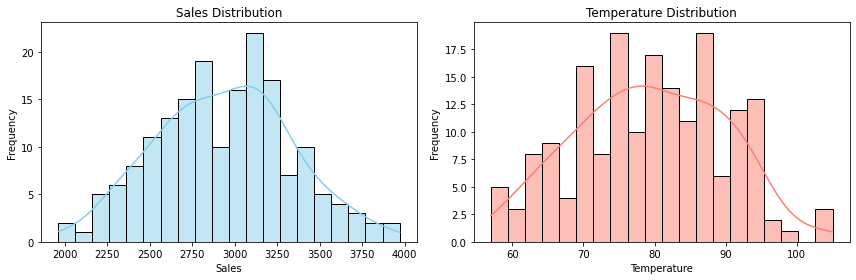

In [3]:
# plots of the data distributions
plt.figure(figsize=(12, 4))

# Histogram for Sales
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=20, color='skyblue', edgecolor='black',kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Histogram for Temperature
plt.subplot(1, 2, 2)
sns.histplot(df['Temperature_F'], bins=20, color='salmon', edgecolor='black',kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

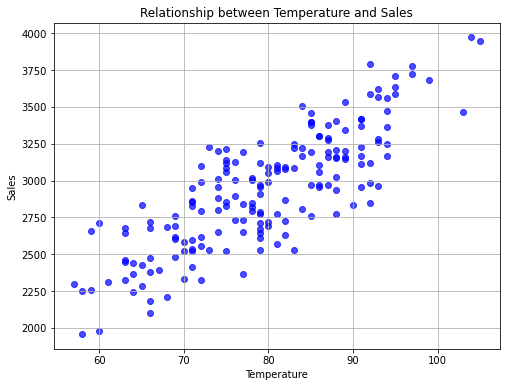

Correlation Coefficient between Temperature and Sales: 0.8230462394468031


In [4]:
'''
9. Descriptive information about the relationships between the two variables, including correlation
and scatterplots
'''
correlation = df['Temperature_F'].corr(df['Sales'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature_F'], df['Sales'], color='blue', alpha=0.7)
plt.title('Relationship between Temperature and Sales')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f'Correlation Coefficient between Temperature and Sales: {correlation}')

In [5]:
'''
10. A regression analysis to test the hypothesis. If you have trouble getting the regression analysis
to work, look closely at the data. Your friend wasn’t always able to get sales data for each day.
Choose a method to handle rows with missing data.
'''
# Handle missing data (drop rows with missing values)
df_new = df.dropna()

# Define the independent variable (X) and the dependent variable (y)
X = df_new['Temperature_F']
X = sm.add_constant(X)  # Add a constant term to the independent variable
y = df_new['Sales']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           4.21e-45
Time:                        18:23:42   Log-Likelihood:                -1217.6
No. Observations:                 178   AIC:                             2439.
Df Residuals:                     176   BIC:                             2445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           423.2649    131.833      3.211

Section2

In [6]:
'''
2. This problem is an example of how gradient descent can fail with raw data. There are more 
sophisticated modifications to gradient descent that address those failures. When you try this 
problem, it will not converge. Try it anyway and graph the loss function over 1000 iterations so 
that you can see what is happening. Produce 3 graphs of iterations (x) and loss (y) for 3 learning 
rates (0.1, 0.01, 0.001)
'''
def gradient_descent(X, y, learning_rate, epochs):
    num_samples, num_features = X.shape
    coefficients = np.zeros((num_features, 1))
    loss_history = []
    
    for _ in range(epochs):
        predictions = np.matmul(X, coefficients)
        errors = predictions - y
        gradients = np.matmul(X.T, errors) / num_samples
        coefficients -= learning_rate * gradients
        
        # Calculate mean squared error for the current iteration
        mean_squared_error = np.mean(errors**2)
        loss_history.append(mean_squared_error)
    
    return coefficients, loss_history


C:\Users\93505\AppData\Local\Temp\ipykernel_3856\1230226096.py:20: RuntimeWarning: overflow encountered in square
  mean_squared_error = np.mean(errors**2)
C:\Users\93505\AppData\Local\Temp\ipykernel_3856\1230226096.py:16: RuntimeWarning: overflow encountered in matmul
  gradients = np.matmul(X.T, errors) / num_samples
C:\Users\93505\AppData\Local\Temp\ipykernel_3856\1230226096.py:17: RuntimeWarning: invalid value encountered in subtract
  coefficients -= learning_rate * gradients


learning_rate :  0.1
coefficients : [[nan]
 [nan]]
learning_rate :  0.01
coefficients : [[nan]
 [nan]]
learning_rate :  0.001
coefficients : [[nan]
 [nan]]


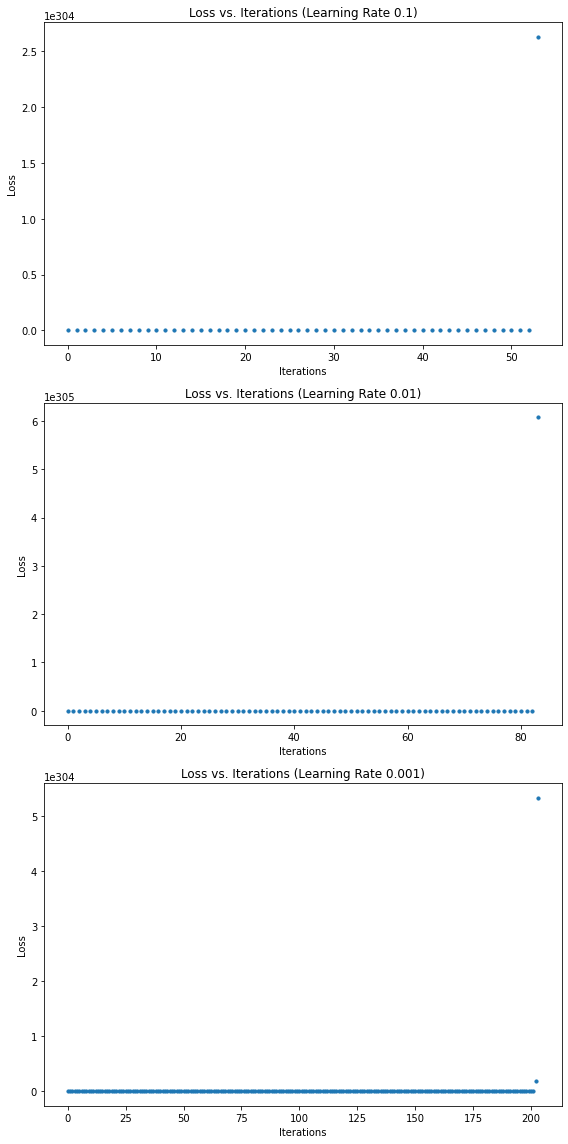

In [9]:
X = df_new['Temperature_F'] 
Y = df_new['Sales']
y = np.array(Y)
X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Set number of epochs
epochs = 1000

# Perform gradient descent and record loss history for different learning rates
learning_rates = [0.1, 0.01, 0.001]
loss_history_dict = {}

for learning_rate in learning_rates:
    coefficients, loss_history = gradient_descent(X_with_intercept, y.reshape(-1, 1), learning_rate, epochs)
    loss_history_dict[learning_rate] = loss_history
    print('learning_rate : ', learning_rate)
    print('coefficients :', coefficients)

plt.figure(figsize=(8, 16))

for i, lr in enumerate(learning_rates):
    plt.subplot(3, 1, i+1)
    plt.scatter(range(epochs), loss_history_dict[lr], s=10, label=f'Learning Rate {lr}')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(f"Loss vs. Iterations (Learning Rate {lr})")

plt.tight_layout()
plt.show()

In [10]:
'''
3. Standardize your X and Y variables. To do this, subtract the mean from each value and divide it
by the standard deviation. Please note that the input array for X needs to have a column of 1’s in 
it. Do not standardize the 1’s.
'''
X_mean = np.mean(X_with_intercept[:, 1:], axis=0)
X_std = np.std(X_with_intercept[:, 1:], axis=0)
X_standardized = X_with_intercept.copy()
X_standardized[:, 1:] = (X_standardized[:, 1:] - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
y_standardized = (y - y_mean) / y_std
print('X_standardized :')
print(X_standardized)
print('y_standardized :')
print(y_standardized)


X_standardized :
[[ 1.         -0.42532007]
 [ 1.         -1.58410027]
 [ 1.          0.54033009]
 [ 1.          0.25063504]
 [ 1.         -1.29440522]
 [ 1.          0.34720006]
 [ 1.         -1.39097023]
 [ 1.         -0.03906001]
 [ 1.         -1.58410027]
 [ 1.         -1.1978402 ]
 [ 1.         -0.13562502]
 [ 1.          0.63689511]
 [ 1.          0.83002514]
 [ 1.         -0.03906001]
 [ 1.         -1.97036033]
 [ 1.          0.63689511]
 [ 1.         -1.39097023]
 [ 1.          0.92659016]
 [ 1.          0.54033009]
 [ 1.          1.31285022]
 [ 1.         -0.52188509]
 [ 1.         -0.23219004]
 [ 1.          1.11972019]
 [ 1.         -1.48753525]
 [ 1.          0.92659016]
 [ 1.          1.31285022]
 [ 1.         -1.48753525]
 [ 1.          0.83002514]
 [ 1.          0.92659016]
 [ 1.          1.89224032]
 [ 1.          2.3750654 ]
 [ 1.          1.40941524]
 [ 1.          0.44376507]
 [ 1.         -1.58410027]
 [ 1.          0.92659016]
 [ 1.         -1.87379532]
 [ 1.      

In [11]:
'''
4. Rerun your section 1 model using the standardized inputs and 2 different learning rates (0.01, 
0.001). Compare your results using gradient descent and using the module you used in Section 1
for the standardized inputs.
'''
#Section 1 module
# Define the independent variable (X) and the dependent variable (y)
X = X_standardized
X = sm.add_constant(X)  # Add a constant term to the independent variable
y = y_standardized

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           4.21e-45
Time:                        18:25:43   Log-Likelihood:                -151.88
No. Observations:                 178   AIC:                             307.8
Df Residuals:                     176   BIC:                             314.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.29e-16      0.043  -5.35e-15      1.0

In [13]:
# Set number of epochs
epochs = 1000

# Perform gradient descent and record loss history for different learning rates
learning_rates = [0.01, 0.001]

loss_history_1000 = {}

print("When iterate 1000 times")
for learning_rate in learning_rates:
    coefficients, loss_history = gradient_descent(X_standardized, y_standardized.reshape(-1, 1), learning_rate, epochs)

    loss_history_1000[learning_rate] = loss_history
    print('learning_rate : ', learning_rate)
    print('coefficients :', coefficients)

# Set number of epochs
epochs_2 = 3000
loss_history_3000 = {}
print()
print("When iterate 3000 times")
for learning_rate in learning_rates:
    coefficients, loss_history = gradient_descent(X_standardized, y_standardized.reshape(-1, 1), learning_rate, epochs_2)
    loss_history_3000[learning_rate] = loss_history
    print('learning_rate : ', learning_rate)
    print('coefficients :', coefficients)

When iterate 1000 times
learning_rate :  0.01
coefficients : [[1.68061570e-16]
 [8.23010708e-01]]
learning_rate :  0.001
coefficients : [[-3.45192040e-17]
 [ 5.20415903e-01]]

When iterate 3000 times
learning_rate :  0.01
coefficients : [[1.67094802e-16]
 [8.23046239e-01]]
learning_rate :  0.001
coefficients : [[1.22645963e-16]
 [7.82130641e-01]]


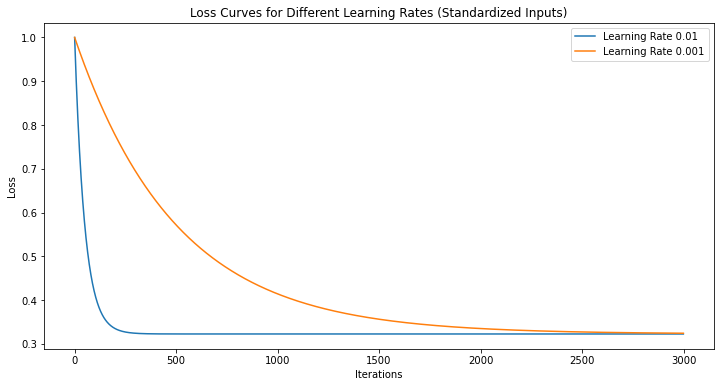

In [14]:
'''5. Plot the loss (i.e. cost) function over the iterations for both learning rates on the same grap'''


plt.figure(figsize=(12, 6))

for lr in learning_rates:
    plt.plot(range(epochs_2), loss_history_3000[lr], label=f'Learning Rate {lr}')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Learning Rates (Standardized Inputs)")
plt.legend()
plt.show()